# Ejemplo 1: Regresión lineal

## Descripción
Supongamos que tienes un conjunto de datos que contiene información sobre el precio de las casas en función de varias características, como el número de habitaciones, el tamaño del lote y la ubicación. Aquí tienes un ejemplo en Python utilizando las bibliotecas scikit-learn y seaborn:

In [93]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [95]:
# Generar un conjunto de datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)
X[:10]

array([[5.48813504],
       [7.15189366],
       [6.02763376],
       [5.44883183],
       [4.23654799],
       [6.45894113],
       [4.37587211],
       [8.91773001],
       [9.63662761],
       [3.83441519]])

In [96]:
y[:10]

array([[10.81112024],
       [16.20461381],
       [13.52092996],
       [10.36141997],
       [10.96134818],
       [15.81377144],
       [10.9305238 ],
       [18.65553518],
       [19.20250259],
       [ 9.7232821 ]])

In [101]:
# Crear un DataFrame de Pandas
# flatten se utiliza para convertir una matriz (o array multidimensional) en un array unidimensional
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
df

,X,y
0,5.488135,10.811120
1,7.151894,16.204614
2,6.027634,13.520930
3,5.448832,10.361420
4,4.236548,10.961348
...,...,...
95,1.831914,5.345422
96,5.865129,11.926849
97,0.201075,0.712601
98,8.289400,17.123268


In [98]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size=0.2, random_state=42)

In [99]:
# Crear el modelo de regresión lineal
regression_model = LinearRegression()

In [100]:
# Entrenar el modelo con el conjunto de entrenamiento
regression_model.fit(X_train, y_train)


LinearRegression()

In [102]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [103]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir el MSE y R^2
print("MSE:", mse)
print("R^2:", r2)

MSE: 0.917753246971429
R^2: 0.9576884341540605


In [104]:
# Realizar validación cruzada
cv_scores = cross_val_score(regression_model, df[['X']], df['y'], cv=5)
print("CV Scores:", cv_scores)
print("Promedio de CV Scores:", np.mean(cv_scores))

CV Scores: [0.96859697 0.95249312 0.97017065 0.96897191 0.97007101]
Promedio de CV Scores: 0.9660607330261536


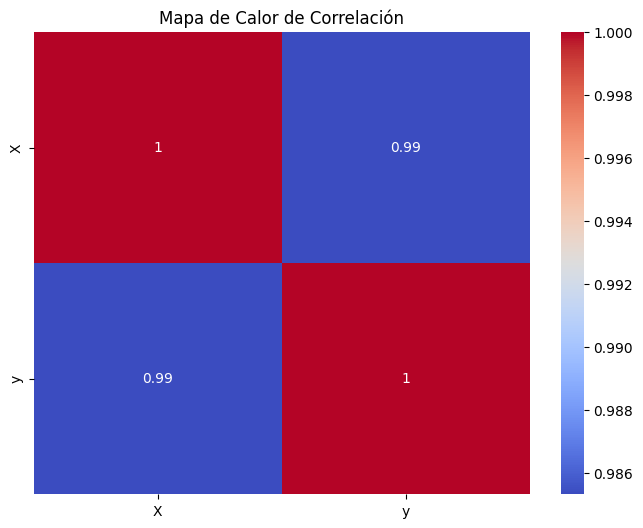

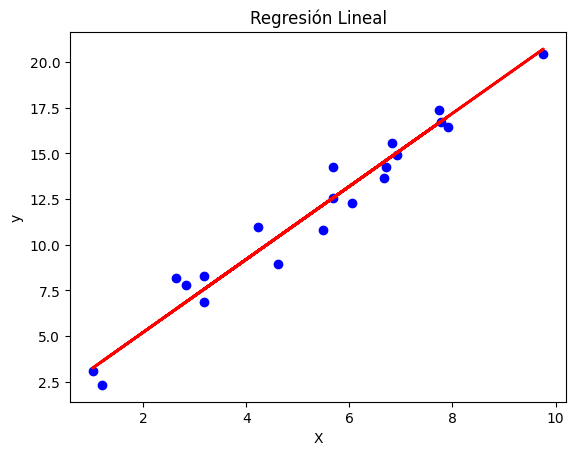

In [105]:
# Crear un mapa de calor de la correlación
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Graficar la regresión lineal
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.show()